# Classificação de textos com SpaCy

## Etapa 1: Importação e instalação das bibliotecas

In [ ]:
pip install spacy

In [ ]:
import spacy
spacy.__version__

'2.2.4'

In [ ]:
!python3 -m spacy download pt

In [ ]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Etapa 2: Carregamento da base de dados

In [ ]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')

In [ ]:
base_dados.shape

(196, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


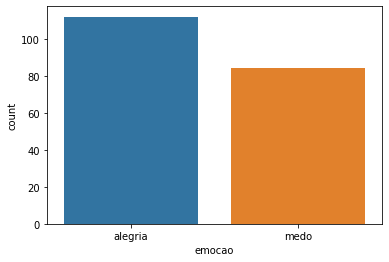

In [ ]:
sns.countplot(base_dados['emocao'], label='Contagem');

## Etapa 3: Função para pré-precessamento dos textos

In [ ]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
print(stop_words)

{'usa', 'antes', 'nesse', 'fomos', 'povo', 'vários', 'naquela', 'através', 'nossos', 'quinta', 'logo', 'contudo', 'favor', 'primeira', 'faz', 'sobre', 'além', 'sua', 'nossas', 'fui', 'tanto', 'cento', 'ambas', 'como', 'treze', 'estar', 'mais', 'tão', 'último', 'nível', 'catorze', 'todo', 'nenhuma', 'entre', 'números', 'põe', 'fazes', 'coisa', 'mil', 'só', 'partir', 'desta', 'porquê', 'vão', 'qualquer', 'dezasseis', 'forma', 'maiorias', 'os', 'veja', 'des', 'novas', 'somente', 'grande', 'nosso', 'dá', 'este', 'certeza', 'usar', 'fostes', 'nas', 'elas', 'três', 'todas', 'nova', 'vinda', 'eventual', 'com', 'todos', 'lado', 'ponto', 'apenas', 'dão', 'conhecida', 'posso', 'quais', 'vais', 'estes', 'alguns', 'vocês', 'outras', 'de', 'faço', 'quarto', 'tal', 'próximo', 'conhecido', 'neste', 'porém', 'duas', 'muito', 'próprio', 'embora', 'iniciar', 'se', 'ademais', 'comprida', 'porquanto', 'bastante', 'sou', 'estás', 'pois', 'cima', 'algumas', 'ambos', 'cedo', 'valor', 'toda', 'temos', 'dentro

In [ ]:
len(stop_words)

413

In [ ]:
pln = spacy.load('pt')

In [ ]:
pln

In [ ]:
def preprocessamento(texto):
  texto.lower()
  documento = pln(texto)
  lista = []
  for token in documento:
   # lista.append(token.text)
   lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  return lista


In [ ]:
teste = preprocessamento('Estou aprendendo 1 10 23 preprocessamento de linguagem natural, curso em SP.')
teste

'Estou aprender preprocessamento linguagem natural cursar SP'

## Etapa 4: Pré-Processamento da base de dados

### Limpeza dos textos

In [ ]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [ ]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [ ]:
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


### Tratamento da Classe

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [ ]:
type(exemplo_base_dados)

list

In [ ]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [ ]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(exemplo_base_dados[0][1])

dict

In [ ]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_final)

196

In [ ]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
base_dados_final[0][0]

'trabalhar agradável'

In [ ]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
type(base_dados_final[0][1])

dict

In [ ]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

## Etapa 5: Criação do classificador

In [44]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat')
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
modelo.add_pipe(categorias)
historico = []

In [45]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
    if epoca % 100 == 0:
      print(losses)
      historico.append(losses)

{'textcat': 0.000612751638982445}
{'textcat': 0.0012307649594731629}
{'textcat': 0.001971751800738275}
{'textcat': 0.002620683517307043}
{'textcat': 0.0031381069566123188}
{'textcat': 0.0040503330528736115}
{'textcat': 0.005950420629233122}
{'textcat': 6.536728491823851e-09}
{'textcat': 1.0306451247998893e-08}
{'textcat': 1.3393455233767781e-08}
{'textcat': 1.773662505755169e-08}
{'textcat': 2.1185540655110913e-08}
{'textcat': 2.6148311738083407e-08}
{'textcat': 3.803239034816386e-08}
{'textcat': 1.2553182937580232e-09}
{'textcat': 2.9602383877502803e-09}
{'textcat': 4.187514113240809e-09}
{'textcat': 5.940530289905155e-09}
{'textcat': 7.511048893960037e-09}
{'textcat': 8.573566745440075e-09}
{'textcat': 1.5023079669163053e-08}
{'textcat': 7.366983689749418e-10}
{'textcat': 1.5974130351814608e-09}
{'textcat': 2.426892797835478e-09}
{'textcat': 2.9663004275093385e-09}
{'textcat': 3.4829380490819517e-09}
{'textcat': 4.14006995352878e-09}
{'textcat': 8.928830896870465e-09}
{'textcat': 4.1

In [46]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [47]:
historico_loss = np.array(historico_loss)
historico_loss

array([5.95042063e-03, 5.95042063e-03, 5.95042063e-03, 5.95042063e-03,
       5.95042063e-03, 5.95042063e-03, 5.95042063e-03, 3.80323903e-08,
       3.80323903e-08, 3.80323903e-08, 3.80323903e-08, 3.80323903e-08,
       3.80323903e-08, 3.80323903e-08, 1.50230797e-08, 1.50230797e-08,
       1.50230797e-08, 1.50230797e-08, 1.50230797e-08, 1.50230797e-08,
       1.50230797e-08, 8.92883090e-09, 8.92883090e-09, 8.92883090e-09,
       8.92883090e-09, 8.92883090e-09, 8.92883090e-09, 8.92883090e-09,
       4.58042371e-09, 4.58042371e-09, 4.58042371e-09, 4.58042371e-09,
       4.58042371e-09, 4.58042371e-09, 4.58042371e-09, 3.09762649e-09,
       3.09762649e-09, 3.09762649e-09, 3.09762649e-09, 3.09762649e-09,
       3.09762649e-09, 3.09762649e-09, 2.33980993e-09, 2.33980993e-09,
       2.33980993e-09, 2.33980993e-09, 2.33980993e-09, 2.33980993e-09,
       2.33980993e-09, 1.86876638e-09, 1.86876638e-09, 1.86876638e-09,
       1.86876638e-09, 1.86876638e-09, 1.86876638e-09, 1.86876638e-09,
      

Text(0, 0.5, 'Erro')

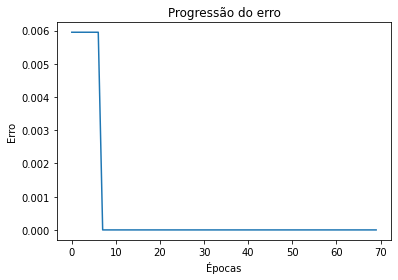

In [48]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [49]:
modelo.to_disk('modelo')

## Etapa 6: Testes com uma fase

In [51]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [53]:
texto_positivo = 'eu adoro cor dos seus olhos'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [55]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [56]:
previsao.cats

{'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05}

In [58]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.0017360546626150608, 'MEDO': 0.9990742206573486}

## Etapa 7: Avaliação do modelo

### Avaliação na base de treinamento

In [59]:
previsoes = []
for texto in base_dados['texto']:
  # print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [60]:
previsoes

[{'ALEGRIA': 0.9997914433479309, 'MEDO': 8.973168587544933e-05},
 {'ALEGRIA': 0.9996017813682556, 'MEDO': 0.00015276689373422414},
 {'ALEGRIA': 0.9997883439064026, 'MEDO': 0.00024175751605071127},
 {'ALEGRIA': 0.9996509552001953, 'MEDO': 0.00020876563212368637},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.999703586101532, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9998834133148193, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996365308761597, 'MEDO': 7.851976988604292e-05},
 {'ALEGRIA': 0.9998236298561096, 'MEDO': 0.00013738554844167084},
 {'ALEGRIA': 0.99959796667099, 'MEDO': 0.00013686201418749988},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9997817873954773, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9988760352134705, 'MEDO': 0.0002768478007055819},
 {'ALEGRIA': 0.99992382

In [65]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [66]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [67]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [69]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [70]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [71]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [72]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [73]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [74]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [75]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [76]:
respostas_reais = base_dados_teste['emocao'].values

In [77]:
accuracy_score(respostas_reais, previsoes_final)

0.5119047619047619

In [78]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[30, 18],
       [23, 13]])